In [1]:
import os
import sys
import importlib

os.environ["JAX_ENABLE_X64"] = "true"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ['ENABLE_PJRT_COMPATIBILITY'] = 'false'
os.environ["JAX_PLATFORMS"] = "cpu"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from jax.scipy.special import erfc

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font_axis_label = 16

In [3]:
import src
importlib.import_module(f'src')
for module in dir(src):
    if '__' not in module:
        print(module)
        importlib.import_module(f'src.{module}')
        importlib.reload(sys.modules[f'src.{module}'])

from src.experiments import experiment_toy
from src.theory_utils_spectral import SVR_th_spectral
from src.theory_utils_toy_data import SVR_th

In [9]:
P, N, grid_size, num_trials = 800, 20, 5, 5
P, N, grid_size, num_trials = 800, 200, 5, 5

corr_list = np.linspace(0.1, 1, grid_size)
noise_list = np.linspace(0.01, 1, grid_size)
epsilon_list = np.append([-1, -2], np.linspace(0., 0.8, grid_size))
alpha_list = np.arange(0.1, 3, 0.3)

centroid_seed = 42
lamb = 1e-18
fn_list = ['linsvr2']

overwrite = False
plot_fig = False

alldata_file = f'all_data_toy_new_P_{P}_N_{N}_grid_{grid_size}'\
    f'_centroid_seed_{centroid_seed}_lamb_{lamb:.1e}_fn_{str(fn_list)}.npz'
    
if os.path.exists('./results/'+alldata_file) and not overwrite:
    data = np.load('./results/'+alldata_file, allow_pickle=True)['data'].tolist()
else:
    data = experiment_toy(P=P,
                          N=N,
                          centroid_seed=centroid_seed,
                          grid_size=grid_size,
                          num_trials=num_trials,
                          overwrite=overwrite,
                          plot_fig=plot_fig,
                          SVR_th=SVR_th_spectral,
                          corr_list=corr_list,
                          noise_list=noise_list,
                          epsilon_list=epsilon_list,
                          alpha_list=alpha_list,
                          lamb=lamb,
                          fn_list=fn_list)

exp_params = data.pop('exp_params')

corr_0.100_noise_0.010_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.100_noise_0.258_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.100_noise_0.505_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.100_noise_0.752_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.100_noise_1.000_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.325_noise_0.010_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.325_noise_0.258_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.325_noise_0.505_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.325_noise_0.752_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.325_noise_1.000_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz
corr_0.550_noise_0.010_P_800_N_200_grid_5_centroid_seed_42_lamb_1.0e-18_fn_['linsvr2'].npz

In [10]:
P = exp_params['P']
N = exp_params['N']
centroid_seed = exp_params['centroid_seed']
lamb = exp_params['lamb']
num_trials = exp_params['num_trials']
fn_list = exp_params['fn_list']
corr_list = np.array(exp_params['corr_list'])
noise_list = np.array(exp_params['noise_list'])
epsilon_list = np.array(exp_params['epsilon_list'])
alpha_list = np.array(exp_params['alpha_list'])
alpha_list_th = data[corr_list[0]][noise_list[0]]['alpha_list_th']

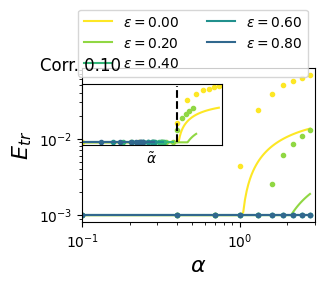

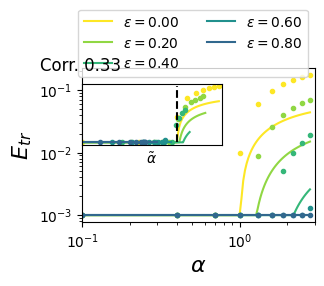

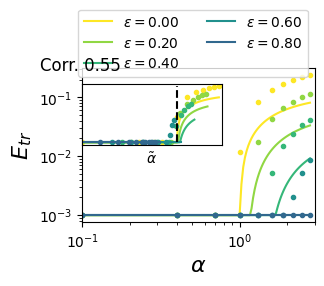

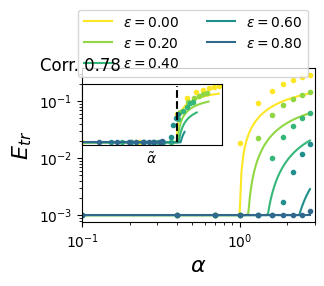

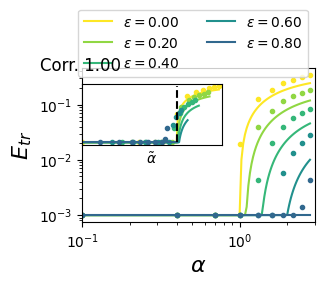

In [11]:
assert len(fn_list) > 0

noise_idx = -1
skip_idx = 1

eps_inds = [eps not in [-1, -2] and eps < 0.95 for eps in epsilon_list]
eps_list = epsilon_list[eps_inds]

for j, corr in enumerate(corr_list):
    
    corr = corr_list[j]
    noise = noise_list[noise_idx]
    
    all_results_th = data[corr][noise]

    fig, axs = plt.subplots(1, len(fn_list), figsize=(3*len(fn_list), 2))
    if len(fn_list) == 1:
        axs = [axs]

    ins_axs = [ax.inset_axes([0, 0.5, .6, .4]) for ax in axs]

    cmap_colors = [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(epsilon_list))]
    cmap_colors_alt = cmap_colors

    for n, fn in enumerate(fn_list):

        th_res = {key: all_results_th[key][eps_inds] for key in ['C', 'Q', 'Chat', 'Qhat',
                                                                                  'Etr', 'alpha', 'alpha_eff', 'f']}
        th_res['Etr'] = th_res['Etr'] / (1+noise**2*(1-corr))**2
        th_res = {key: np.clip(val, 1e-3, 1e2) for key, val in th_res.items()}
        alpha_th = th_res['alpha']
        alpha_eff_th = th_res['alpha_eff']

        exp_res = {key: all_results_th[key][eps_inds] for key in [f'gen_err_{fn}',
                                                                                   f'tr_err_{fn}',
                                                                                   f'eff_ratio_{fn}',
                                                                                   f'eff_ratio2_{fn}']}
        exp_res = {key: np.clip(val, 1e-3, 1e2) for key, val in exp_res.items()}
        exp_res['alpha_exp'] = np.tile(alpha_list, (len(eps_list), 1))
        exp_res['alpha_eff_exp'] = exp_res['alpha_exp'] * erfc(eps_list[:, None] / np.sqrt(2*exp_res[f'gen_err_{fn}']))
        exp_res['eff_ratio'] = exp_res[f'eff_ratio_{fn}']
        exp_res['eff_ratio2'] = exp_res[f'eff_ratio2_{fn}']
        exp_res = {key: np.clip(val, 1e-5, 1e2) for key, val in exp_res.items()}

        gen_err_svr = exp_res[f'gen_err_{fn}']
        tr_err_svr = exp_res[f'tr_err_{fn}']
        alpha_exp = exp_res['alpha_exp']
        alpha_eff_exp = exp_res[f'alpha_eff_exp']
        alpha_eff_exp2 = alpha_exp*exp_res['eff_ratio']
        alpha_eff_exp3 = alpha_exp*exp_res['eff_ratio2']

        ylims = [np.min(th_res['C']), np.min([1.5, np.max(th_res['C'])])]
        ylims = [min(np.min(gen_err_svr), np.min(th_res['C'])), np.min([2.5, np.max(th_res['C'])])]
        ylims = [0, 2]
        
        for i, eps in enumerate(eps_list):

            axs[n].loglog(alpha_th[i], th_res['Etr'][i], color=cmap_colors[i], label=rf'$\varepsilon={eps:.2f}$')
            axs[n].semilogy(alpha_exp[i], tr_err_svr[i], '.', color=cmap_colors[i])

            ins_axs[n].loglog(
                alpha_eff_th[i],
                th_res['Etr'][i],
                color=cmap_colors[i],
                label=rf'$\varepsilon={eps:.2f}$')
            ins_axs[n].semilogy(alpha_eff_exp[i], tr_err_svr[i], '.', color=cmap_colors[i])

        ins_axs[n].vlines(1, np.min(tr_err_svr), np.max(tr_err_svr), color='k', linestyles='dashed')
        ins_axs[n].set_xlim([1e-1, 3])
        ins_axs[n].set_xticks([])
        ins_axs[n].set_yticks([])
        ins_axs[n].minorticks_off()
        ins_axs[n].set_xlabel(r'$\tilde\alpha$')

        axs[n].set_ylabel(r'$E_{tr}$', fontsize=font_axis_label)
        axs[n].set_xlabel(r'$\alpha$', fontsize=font_axis_label)
        axs[n].set_xlim([1e-1, 3])
        axs[n].legend(ncols=2, bbox_to_anchor=(0.5, 0.9, 0.5, 0.5))

    plt.suptitle(f'Corr. {corr:.2f}', x=0.12, y=.94)
    # plt.savefig(f'./figures/tr_err_corr_{corr:.2f}.pdf', bbox_inches='tight')
    plt.show()

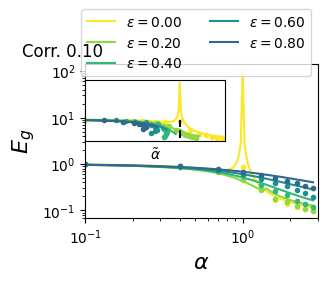

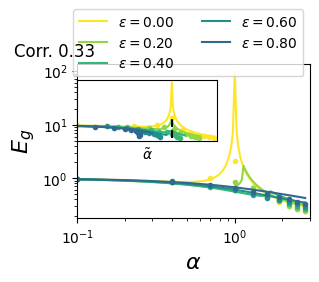

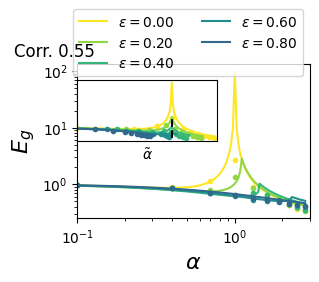

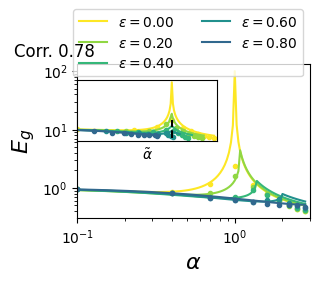

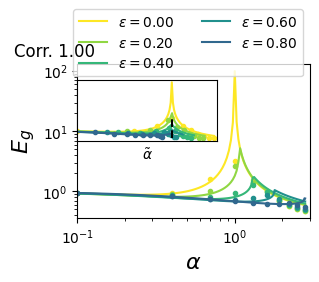

In [12]:
assert len(fn_list) > 0

noise_idx = -1
skip_idx = 1

eps_inds = [eps not in [-1, -2] and eps < 0.95 for eps in epsilon_list]
eps_list = epsilon_list[eps_inds]

for j, corr in enumerate(corr_list):
    
    corr = corr_list[j]
    noise = noise_list[noise_idx]
    
    all_results_th = data[corr][noise]

    fig, axs = plt.subplots(1, len(fn_list), figsize=(3*len(fn_list), 2))
    if len(fn_list) == 1:
        axs = [axs]

    ins_axs = [ax.inset_axes([0, 0.5, .6, .4]) for ax in axs]

    cmap_colors = [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(epsilon_list))]
    cmap_colors_alt = cmap_colors

    for n, fn in enumerate(fn_list):

        th_res = {key: all_results_th[key][eps_inds] for key in ['C', 'Q', 'Chat', 'Qhat',
                                                                                 'Etr', 'alpha', 'alpha_eff', 'f', 'g']}
        th_res['Etr'] = th_res['Etr'] / (1+noise_list[noise_idx]**2*(1-corr))**2
        th_res = {key: np.clip(val, 1e-3, 1e2) for key, val in th_res.items()}
        alpha_th = th_res['alpha']
        alpha_eff_th = th_res['alpha_eff']

        exp_res = {key: all_results_th[key][eps_inds] for key in [f'gen_err_{fn}',
                                                                                   f'tr_err_{fn}',
                                                                                   f'eff_ratio_{fn}',
                                                                                   f'eff_ratio2_{fn}']}
        exp_res['alpha_exp'] = np.tile(alpha_list, (len(eps_list), 1))
        exp_res['alpha_eff_exp'] = exp_res['alpha_exp'] * erfc(eps_list[:, None] / np.sqrt(2*exp_res[f'gen_err_{fn}']))
        exp_res['eff_ratio'] = exp_res[f'eff_ratio_{fn}']
        exp_res['eff_ratio2'] = exp_res[f'eff_ratio2_{fn}']
        exp_res = {key: np.clip(val, 1e-3, 1e2) for key, val in exp_res.items()}

        gen_err_svr = exp_res[f'gen_err_{fn}']
        tr_err_svr = exp_res[f'tr_err_{fn}']
        alpha_exp = exp_res['alpha_exp']
        alpha_eff_exp = exp_res[f'alpha_eff_exp']
        alpha_eff_exp2 = alpha_exp*exp_res['eff_ratio']
        alpha_eff_exp3 = alpha_exp*exp_res['eff_ratio2']

        ylims = [np.min(th_res['C']), np.min([1.5, np.max(th_res['C'])])]
        ylims = [min(np.min(gen_err_svr), np.min(th_res['C'])), np.min([2.5, np.max(th_res['C'])])]
        ylims = [0, 2]

        for i, eps in enumerate(eps_list):

            if eps < .95 and eps not in [-1, -2]:

                axs[n].loglog(alpha_th[i], (th_res['C'])[i], color=cmap_colors[i], label=rf'$\varepsilon={eps:.2f}$')
                axs[n].loglog(alpha_exp[i], gen_err_svr[i], '.', color=cmap_colors[i])

                ins_axs[n].loglog(
                    alpha_eff_th[i],
                    (th_res['C'])[i],
                    color=cmap_colors[i],
                    label=rf'$\varepsilon={eps:.2f}$')
                ins_axs[n].semilogy(alpha_eff_exp[i], gen_err_svr[i], '.', color=cmap_colors[i])

        ins_axs[n].vlines(1, np.min(gen_err_svr), np.max(gen_err_svr), color='k', linestyles='dashed')
        ins_axs[n].set_xlim([1e-1, 3])
        ins_axs[n].set_xticks([])
        ins_axs[n].set_yticks([])
        ins_axs[n].minorticks_off()
        ins_axs[n].set_xlabel(r'$\tilde\alpha$')

        axs[n].set_ylabel(r'$E_{g}$', fontsize=font_axis_label)
        axs[n].set_xlabel(r'$\alpha$', fontsize=font_axis_label)
        axs[n].set_xlim([1e-1, 3])
        axs[n].legend(ncols=2, bbox_to_anchor=(0.5, 0.9, 0.5, 0.5))

    plt.suptitle(f'Corr. {corr:.2f}', x=0.05, y=.99)
    # plt.savefig(f'./figures/gen_err_corr_{corr:.2f}.pdf', bbox_inches='tight')
    plt.show()